<b>Load the Data</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

pokemon_data = pd.read_csv('pokemonData.csv')
pokemon_data.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Tier
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped,LC
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped,NFE
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped,UU
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed,LC
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed,NFE


<b>Declare Training and Testing Set</b><br>
Seperate Pokemon Dataset into test and training set. 500 of the data will be use for training, and the remaining will be use for testing

In [2]:
pokemon_data_train = pokemon_data[:500]
pokemon_data_test = pokemon_data[500:]

train_length = len(pokemon_data_train)
test_length = len(pokemon_data_test)

# A pokemon's competitive tier and what we will be predicting
tier_target_train = pokemon_data_train['Tier']
tier_target_test = pokemon_data_test['Tier']

# A pokemon's stat total and the feature most likely related to competitive tier
total_train = pokemon_data_train['Total']
total_test = pokemon_data_test['Total']

# A boolean value saying whether a pokemon is a legendary
# Legendary pokemon tend to have higher stat totals
legendary_train = pokemon_data_train['isLegendary']
legendary_test = pokemon_data_test['isLegendary']

# A boolean value saying whether the pokemon has a mega evolution
# Mega evolution adds a flat 100 to the stat total
mega_train = pokemon_data_train['hasMegaEvolution']
mega_test = pokemon_data_test['hasMegaEvolution']

# Pokemon type
type_1_train = pokemon_data_train["Type_1"]
type_2_train = pokemon_data_train["Type_2"]

type_1_test = pokemon_data_test["Type_1"]
type_2_test = pokemon_data_test["Type_2"]

Create a function to turn the string value of a pokemon's type to an integer value

In [3]:
def assign_type(array):
    type_arr = []
    for poke_type in array:
        if poke_type == "Grass":
            type_arr.append(1)
        elif poke_type == "Fire":
            type_arr.append(2)
        elif poke_type == "Water":
            type_arr.append(3)
        elif poke_type == "Electric":
            type_arr.append(4)
        elif poke_type == "Ground":
            type_arr.append(5)
        elif poke_type == "Rock":
            type_arr.append(6)
        elif poke_type == "Steel":
            type_arr.append(7)
        elif poke_type == "Fairy":
            type_arr.append(8)
        elif poke_type == "Dragon":
            type_arr.append(9)
        elif poke_type == "Ghost":
            type_arr.append(10)
        elif poke_type == "Dark":
            type_arr.append(11)
        elif poke_type == "Psychic":
            type_arr.append(12)
        elif poke_type == "Poison":
            type_arr.append(13)
        elif poke_type == "Ice":
            type_arr.append(14)
        elif poke_type == "Fighting":
            type_arr.append(15)
        elif poke_type == "Normal":
            type_arr.append(16)
        elif poke_type == "Flying":
            type_arr.append(17)
        elif poke_type == "Bug":
            type_arr.append(18)
        else:
            type_arr.append(0)
    return type_arr

Group sets of relevant features together

In [4]:
# Put all the individual features in one feature array
training_set = np.empty((train_length,5))
testing_set = np.empty((test_length,5))

type_1_train_numarr =  np.asarray(assign_type(type_1_train))
type_1_test_numarr =  np.asarray(assign_type(type_1_test))

type_2_train_numarr =  np.asarray(assign_type(type_2_train))
type_2_test_numarr =  np.asarray(assign_type(type_2_test))

i = 0
while i < train_length:
    training_set[i] = [type_1_train_numarr[i], type_2_train_numarr[i], total_train[i], legendary_train[i], mega_train[i]]
    i += 1
while i < train_length + test_length:
    testing_set[i-train_length] =  [type_1_test_numarr[i - 500], type_2_test_numarr[i - 500], total_test[i], legendary_test[i], mega_test[i]]
    i += 1

# features that I believe are most relevant to determining tier (total, mega, legendary)
tlm_training_set = np.empty((train_length, 3))
tlm_testing_set = np.empty((test_length, 3))
i = 0
while i < train_length:
    tlm_training_set[i] = [total_train[i], legendary_train[i], mega_train[i]]
    i += 1
while i < train_length + test_length:
    tlm_testing_set[i - train_length] =  [total_test[i], legendary_test[i], mega_test[i]]
    i += 1

# features related to stat total (total, mega)
tm_training_set = np.empty((train_length, 2))
tm_testing_set = np.empty((test_length, 2))
i = 0
while i < train_length:
    tm_training_set[i] = [total_train[i], mega_train[i]]
    i += 1
while i < train_length + test_length:
    tm_testing_set[i - train_length] =  [total_test[i], mega_test[i]]
    i += 1

# features related to stat total (legendary, mega)
lm_training_set = np.empty((train_length, 2))
lm_testing_set = np.empty((test_length, 2))
i = 0
while i < train_length:
    lm_training_set[i] = [legendary_train[i], mega_train[i]]
    i += 1
while i < train_length + test_length:
    lm_testing_set[i - train_length] =  [legendary_test[i], mega_test[i]]
    i += 1

# features related to stat total (types)
type_training_set = np.empty((train_length, 2))
type_testing_set = np.empty((test_length, 2))
i = 0
while i < train_length:
    type_training_set[i] = [type_1_train_numarr[i], type_2_train_numarr[i]]
    i += 1
while i < train_length + test_length:
    type_testing_set[i - train_length] =  [type_1_test_numarr[i - 500], type_2_test_numarr[i - 500]]
    i += 1
Y_train = tier_target_train
Y_test = tier_target_test

In [5]:
from sklearn.preprocessing import Normalizer
def normalize(X):
    data = X
    transformer = Normalizer().fit_transform(data) # fit does nothing.
    return transformer

Predict tier use Logistic Regression.<br>Display accuracy and confusion matrix for each set of features

In [6]:
# Predict with Logistic Regression(LR)
from sklearn.linear_model import LogisticRegression

def lr(X_train, Y_train, X_test, Y_test, description):
    clf = LogisticRegression()
    clf.fit(X_train, Y_train)
    test_pred = clf.predict(X_test)
    print('The accuracy for ' + description + ' %4.2f%%' % (clf.score(X_test, Y_test) * 100))
    
    clf_matrix = confusion_matrix(Y_test, test_pred, labels=['Uber', 'OU', 'UU', 'NU', 'RU', 'PU', 'LC', 'NFE'])
    print("The Confusion Matrix")
    print("Uber OU UU NU  RU PU LC NFE")
    print(clf_matrix)
    
    print('\n')

lr(np.array(total_train).reshape(-1, 1), Y_train, np.array(total_test).reshape(-1, 1), Y_test, 'total stats only')

lr(training_set, Y_train, testing_set, Y_test, 'types total legendary mega features')
lr(normalize(training_set), Y_train, normalize(testing_set), Y_test, 'normalized types total legendary mega features')

lr(tlm_training_set, Y_train, tlm_testing_set, Y_test, 'total legendary mega features')
lr(normalize(tlm_training_set), Y_train, normalize(tlm_testing_set), Y_test, 'normalized total legendary mega features')

lr(tm_training_set, Y_train, tm_testing_set, Y_test, 'total mega features')
lr(normalize(tm_training_set), Y_train, normalize(tm_testing_set), Y_test, 'normalized total mega features')

lr(lm_training_set, Y_train, lm_testing_set, Y_test, 'legendary mega features')
lr(normalize(lm_training_set), Y_train, normalize(lm_testing_set), Y_test, 'normalized legendary mega features')

lr(type_training_set, Y_train, type_testing_set, Y_test, 'type features')
lr(normalize(type_training_set), Y_train, normalize(type_testing_set), Y_test, 'normalized type features') 


The accuracy for total stats only 54.75%
The Confusion Matrix
Uber OU UU NU  RU PU LC NFE
[[ 0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0 22  1  0]
 [ 0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  1 76  0]
 [ 0  0  0  0  0  8 15  0]]


The accuracy for types total legendary mega features 56.11%
The Confusion Matrix
Uber OU UU NU  RU PU LC NFE
[[ 2  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 5  0  0  0  0 13  0  0]
 [ 0  0  0  0  1 21  1  0]
 [ 1  0  0  0  0 17  0  0]
 [ 0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0 77  0]
 [ 0  0  0  0  0  7 16  0]]


The accuracy for normalized types total legendary mega features 34.84%
The Confusion Matrix
Uber OU UU NU  RU PU LC NFE
[[ 0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0 45  0]
 [ 0  0  0  0  0  0 77  0]
 [ 0  0  0  0  0  0 23  0]]


The accuracy for total l

Classify the tiers using Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB

def gnb(X_train, Y_train, X_test, Y_test, description):
    clf = GaussianNB()
    clf.fit(X_train, Y_train)
    test_pred = clf.predict(X_test)
    
    print('The accuracy for ' + description + ' %4.2f%%' % (clf.score(X_test, Y_test) * 100))
    
    clf_matrix = confusion_matrix(Y_test, test_pred, labels=['Uber', 'OU', 'UU', 'NU', 'RU', 'PU', 'LC', 'NFE'])
    print("The Confusion Matrix")
    print("Uber OU UU NU  RU PU LC NFE")
    print(clf_matrix)
    print('\n')

gnb(np.array(total_train).reshape(-1, 1), Y_train, np.array(total_test).reshape(-1, 1), Y_test, 'total stats only')

gnb(training_set, Y_train, testing_set, Y_test, 'types total legendary mega features')
gnb(normalize(training_set), Y_train, normalize(testing_set), Y_test, 'normalized types total legendary mega features')

gnb(tlm_training_set, Y_train, tlm_testing_set, Y_test, 'total legendary mega features')
gnb(normalize(tlm_training_set), Y_train, normalize(tlm_testing_set), Y_test, 'normalized total legendary mega features')

gnb(tm_training_set, Y_train, tm_testing_set, Y_test, 'total mega features')
gnb(normalize(tm_training_set), Y_train, normalize(tm_testing_set), Y_test, 'normalized total mega features')

gnb(lm_training_set, Y_train, lm_testing_set, Y_test, 'legendary mega features')
gnb(normalize(lm_training_set), Y_train, normalize(lm_testing_set), Y_test, 'normalized legendary mega features')

gnb(type_training_set, Y_train, type_testing_set, Y_test, 'type features')
gnb(normalize(type_training_set), Y_train, normalize(type_testing_set), Y_test, 'normalized type features')

The accuracy for total stats only 57.92%
The Confusion Matrix
Uber OU UU NU  RU PU LC NFE
[[ 5  0  0  0  0  1  0  0]
 [ 0  0  2  0  0  5  0  0]
 [ 0  0  3  0  0 12  0  0]
 [ 0  0  0  0  0 22  1  0]
 [ 0  0  1  0  0 15  0  0]
 [ 0  0  1  0  0 44  0  0]
 [ 0  0  0  0  0  1 76  0]
 [ 0  0  0  0  0 13 10  0]]


The accuracy for types total legendary mega features 41.18%
The Confusion Matrix
Uber OU UU NU  RU PU LC NFE
[[ 7  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  6]
 [ 5  0  0  0  0  0  0 13]
 [ 0  0  0  0  1  0  2 20]
 [ 1  0  0  0  0  0  0 17]
 [ 0  0  0  0  0  0  1 44]
 [ 0  0  0  0  0  0 76  1]
 [ 0  0  0  0  0  0 15  8]]


The accuracy for normalized types total legendary mega features 38.01%
The Confusion Matrix
Uber OU UU NU  RU PU LC NFE
[[ 7  0  0  0  0  0  2  0]
 [ 2  0  0  0  0  0  6  0]
 [ 5  0  0  0  0  0 13  0]
 [ 0  0  0  0  1  0 22  0]
 [ 1  0  0  0  0  0 17  0]
 [ 0  0  0  0  0  0 45  0]
 [ 0  0  0  0  0  0 77  0]
 [ 0  0  0  0  0  0 23  0]]


The accuracy for total l

Cluster the total stat value use k-means

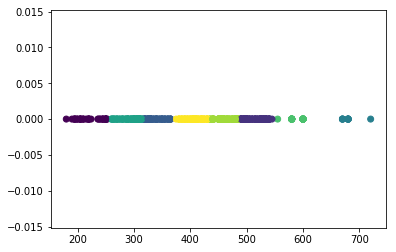

In [25]:
# Use K-mean clustering for total
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
kmeans_set = np.array(total_train).reshape(-1, 1)
graph_y = np.zeros((len(kmeans_set)))
kmeans = KMeans(n_clusters=8, random_state=0)
tier_fit = kmeans.fit(kmeans_set)
tier_graph = kmeans.fit_predict(kmeans_set)

plt.scatter(kmeans_set[:,0], graph_y, c=tier_graph)

Predict tier use SVM. <br>
Display accuracy and confusion matrix for each set of features

In [12]:
from sklearn.svm import SVC

def svm(X_train, Y_train, X_test, Y_test, des):
    svc = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
              max_iter=-1, probability=False, random_state=None, shrinking=True,
              tol=0.001, verbose=False)
    svc.fit(X_train, Y_train)
    test_pred = svc.predict(X_test)
    print('The accuracy for ' + des + ', %4.2f%%'% (svc.score(X_test, Y_test) * 100))
    
    clf_matrix = confusion_matrix(Y_test, test_pred, labels=['Uber', 'OU', 'UU', 'NU', 'RU', 'PU', 'LC', 'NFE'])
    print("The Confusion Matrix")
    print("Uber OU UU NU  RU PU LC NFE")
    print(clf_matrix)
    print("\n")
    
svm(np.array(total_train).reshape(-1, 1), Y_train, np.array(total_test).reshape(-1, 1), Y_test, 'total stats only')

svm(training_set, Y_train, testing_set, Y_test, 'types total legendary mega features')
svm(normalize(training_set), Y_train, normalize(testing_set), Y_test, 'normalized types total legendary mega features')

svm(tlm_training_set, Y_train, tlm_testing_set, Y_test, 'total legendary mega features')
svm(normalize(tlm_training_set), Y_train, normalize(tlm_testing_set), Y_test, 'normalized total legendary mega features')

svm(tm_training_set, Y_train, tm_testing_set, Y_test, 'total mega features')
svm(normalize(tm_training_set), Y_train, normalize(tm_testing_set), Y_test, 'normalized total mega features')

svm(lm_training_set, Y_train, lm_testing_set, Y_test, 'legendary mega features')
svm(normalize(lm_training_set), Y_train, normalize(lm_testing_set), Y_test, 'normalized legendary mega features')

svm(type_training_set, Y_train, type_testing_set, Y_test, 'type features')
svm(normalize(type_training_set), Y_train, normalize(type_testing_set), Y_test, 'normalized type features')

The accuracy for total stats only, 52.49%
The Confusion Matrix
Uber OU UU NU  RU PU LC NFE
[[ 4  3  0  0  0  1  1  0]
 [ 0  1  0  0  1  4  2  0]
 [ 0  3  0  0  1 14  0  0]
 [ 0  1  0  0  2 17  3  0]
 [ 0  3  0  0  4  8  3  0]
 [ 0  0  0  0  4 30 10  1]
 [ 0  0  0  0  0  1 74  2]
 [ 0  0  0  0  0  8 12  3]]


The accuracy for types total legendary mega features, 44.80%
The Confusion Matrix
Uber OU UU NU  RU PU LC NFE
[[ 1  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  2  6  0]
 [ 0  1  0  0  1  3 13  0]
 [ 0  0  0  0  0  8 15  0]
 [ 0  0  0  0  0  1 17  0]
 [ 0  0  0  1  2 22 19  1]
 [ 0  0  0  0  0  3 74  0]
 [ 0  0  0  0  0  4 17  2]]


The accuracy for normalized types total legendary mega features, 34.84%
The Confusion Matrix
Uber OU UU NU  RU PU LC NFE
[[ 0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0 45  0]
 [ 0  0  0  0  0  0 77  0]
 [ 0  0  0  0  0  0 23  0]]


The accuracy for tota